##UNIVERSIDAD DE BUENOS AIRES

###Facultad de Ingeniería

#####1er Cuatrimestre de 2021



*Análisis Numérico I*

---

**Descomposición de señales mediante series de Fourier a través de
resolución de problema de cuadrados mínimos**

---


Curso: Sassano

Grupo: 15

Integrantes: 

*   Mangiaterra, Federico. fmangiaterra@fi.uba.ar . #105771.
*   Montecalvo, Ignacio. imontecalvo@fi.uba.ar . #105555.
*   Aguilar, Eugenia Luz. eaguilar@fi.uba.ar . #105541.






##Introducción

En el siguiente documento se expone el trabajo práctico N°2 de la materia Análisis Numérico I. En él, se desarrolla la descomposición en serie de Fourier de una señal cuadrada, la determinación de los coeficientes de Fourier a través de una aproximación por cuadrados mínimos, la resolución de sistemas de ecuaciones mediante tanto la eliminación gaussiana con pivoteo parcial como vía el método de Gauss-Seidel, y su comparación.







##Objetivos

* Se analiza tanto los valores de los coeficientes de Fourier como el uso de la serie de Fourier para la descomposición de una señal cuadrada.
* Se implementa una aproximación por cuadrados mínimos para determinar los coeficientes de Fourier.
* Se compara la resolución de un sistema de ecuaciones a través de la eliminación gaussiana con pivoteo parcial con la misma a través del método de Gauss-Seidel.







# **Importar bibliotecas**

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

# **1. Forma general de la serie de Fourier de una señal cuadrada**

## **a. Definición matemática de la expresión de señal cuadrada**

<figure>
<center>
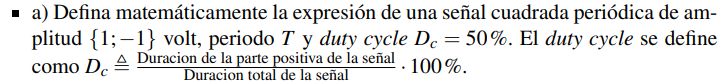
</figure>

Para definir matemáticamente dicha expresión se utiliza la siguiente funcion partida para un sólo período T (de $\frac{-T}{2}$ a $\frac{-T}{2}$), y respetando el Duty Cicle de 50%:


$$
f(t) = f(t+T) = \left\{ \begin{array}{lcc}
             -1 V &   si  & \frac{-T}{2} < t < 0 \\
             \\ 1 V &   si  & 0 < t < \frac{T}{2} \\
             \end{array}
   \right.
$$

## **b. Serie de Fourier: Descomposición y obtención de coeficientes $a_k$ y $b_k$**

<figure>
<center>
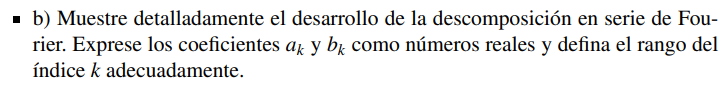
</figure>

Partiendo del Teorema de Fourier, se puede garantizar que una función periódica (que cumpla ciertas condiciones en cuanto a su continuidad) se puede expresar como suma de una cantidad infinita de funciones senoidales con distintas amplitudes y periodos.

$$
f(t) = A_0 + A_1 sen(wt+\phi_1) + ... + A_n sen(nwt+\phi_n)
$$
<br>
Con $A_i, \phi_i$ (tal que $i=1,2,...,n$) constantes y $w = \frac{2\pi}{T}$ la frecuencia.

---
<br>

A su vez, usando identidades trigonométricas se puede descomponer cada termino tal que:
$$
A_k sen(kwt + \phi_k) = A_k cos(\phi_k)\cdot sen(kwt) + A_k sen(\phi_k)\cdot cos(kwt)
$$

Reemplazando $ a_k = A_k sen(\phi_k) $ y $b_k = A_k cos(\phi_k)$

Se obtiene que:
$$
f(t) = \frac {1}{2}a_0 + \sum_{k=1}^{\infty} a_k cos(kwt) + \sum_{k=1}^{\infty} b_k sen(kwt)
$$
Siendo $a_0 = 2A_0$

Tal como se puede ver, la función $f(t)$ está expresada como una combinación lineal de senos y cosenos, siendo ${1, cos(wt),...,cos(nwt),sen(wt),...,sen(nwt)}$ una base ortogonal a partir de la cual se obtiene dicha combinación lineal.
Para obtener el valor de cada uno de los coeficientes debemos hacer la proyección de la función sobre la base, es decir, el producto interno y se obtiene que: 

$$
a_k = \frac{2}{T} \int_{d}^{d+T} \! f(t) \cdot cos(kwt) \,dt \\
b_k = \frac{2}{T} \int_{d}^{d+T} \! f(t) \cdot sin(kwt) \,dt \\
$$
Con $k=1,2,...,n$

---
<br>

Para obtener los coeficientes de la $f(t)$ definida, se debe resolver las expresiones anteriores.
<br>

***Cálculo de los coeficientes $a_k$:***
$$a_k = \frac{2}{T} \left(\int_{\frac{-T}{2}}^{0} \! (-1) \cdot cos(kwt) \,dt + \int_{0}^{\frac{T}{2}} \! (1) \cdot cos(kwt) \,dt\right)$$
<br>

*   Particularmente para $a_0$ vemos que da 0 debido a que queda:
$$
a_0 = \frac{2}{T} \left(\int_{\frac{-T}{2}}^{0} \! (-1)\,dt + \int_{0}^{\frac{T}{2}} \! (1)\,dt\right) = \frac{2}{T} \cdot \left(\frac{T}{2} - \frac{T}{2}\right) = 0
$$
<br>

* Para cualquier $a_k$, con $k = 1,2,...,n$, se tiene que:
$$
a_k = \frac{2}{T} \left(\int_{\frac{-T}{2}}^{0} \!-cos(kwt) \,dt + \int_{0}^{\frac{T}{2}} \!cos(kwt) \,dt\right)\\
a_k =  \frac{2}{T} \left(\frac{-sen(kwt)}{kw} \Bigg|_\frac{-T}{2}^0  + \frac{sen(kwt)}{kw} \Bigg|_0^\frac{T}{2} \right)\\
a_k = \frac{2}{T} \left(\frac{sen(kw \frac{T}{2})}{kw} - \frac{sen(kw \frac{T}{2})}{kw} \right)\\
$$
<br>

$$
\Longrightarrow a_k = 0\\
$$

Esto significa que $f(t)$ es en este caso ortogonal respecto del subespacio de los cosenos, y si se grafica se puede ver a simple vista qie solo tendrá componentes senos ya que tiene un comportamiento antisimétrico.
<br>
<br>

***Cálculo de los coeficientes $b_k$:***

$$b_k = \frac{2}{T} \left(\int_{\frac{-T}{2}}^{0} \! (-1) \cdot sen(kwt) \,dt + \int_{0}^{\frac{T}{2}} \! (1) \cdot sen(kwt) \,dt\right)\\
b_k = \frac{2}{T} \left(\int_{\frac{-T}{2}}^{0} \!-sen(kwt) \,dt + \int_{0}^{\frac{T}{2}} \!sen(kwt) \,dt\right)\\
b_k =  \frac{2}{T} \left(\frac{cos(kwt)}{kw} \Bigg|_\frac{-T}{2}^0  + \frac{-cos(kwt)}{kw} \Bigg|_0^\frac{T}{2} \right)\\
b_k = \frac{2}{Twk} \left(2cos(0) -2cos(kw \frac{T}{2}) \right)\\
b_k = \frac{4}{Twk} \left(1-cos(kw \frac{T}{2}) \right)\\
$$

Además, sabiendo que $w = \frac{2\pi}{T}$, se tiene que $Tw = T \cdot\frac{2\pi}{T} = 2\pi$. Reemplazando se llega a que:
<br>
<br>

$$
\Longrightarrow b_k = \frac{2}{k\pi} \left(1-cos(k\pi) \right)\\
$$
<br>

---
<br>

Por último, queda analizar el rango del índice $k$. Tal como se observa en las explicaciones anteriores, $k$ representa la cantidad de iteraciones llevadas a cabo comenzando desde el 1 hasta $+\infty$. Entonces, $k$ puede tomar cualquier valor dentro de $[1 , +\infty]$.







## **c. Ventajas de utilizar representación en Serie de Fourier**

<figure>
<center>
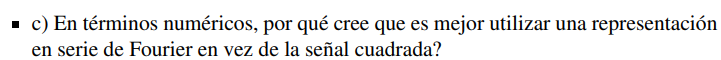
</figure>

Creemos que resulta mucho más conveniente usar Fourier debido a que permite obtener una función muy aproximada de la que se tiene sumando senos y cosenos, es decir, obtenemos una función continua e infinitamente derivable por lo cual presenta menos limitaciones a la hora de trabajar con la misma.

# **2. Determinación de coeficientes de Fourier por ajuste de funciones**

<figure>
<center>
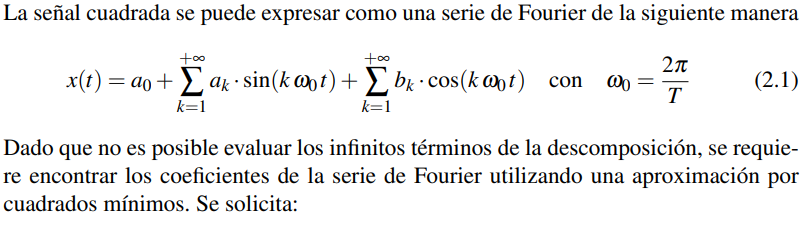
</figure>

---
## **a. Expresión de la función de ajuste $s(t)$**

<figure>
<center>
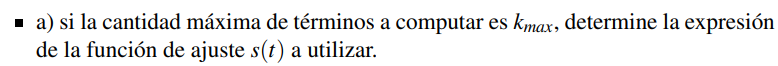
</figure>

La expresión de la función de ajuste $s(t)$ es similar a $x(t)$ con la diferencia de que se debe reemplazar los límites $+\infty$ de la sumatoria por $k_{max}$. Por lo tanto, la expresión queda:
<br>
<br>

$$
s(t) = a_0 + \sum_{k = 1}^{k_{max}} a_k \cdot cos(kwt) + \sum_{k = 1}^{k_{max}} b_k \cdot sin(kwt)
$$

---
## **b. Procedimiento y formulación de ecuaciones normales**

<figure>
<center>
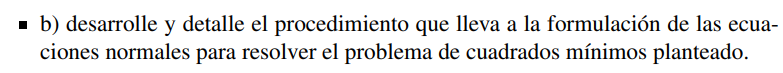
</figure>

A continuación se explicará el proceso para obtener los coeficientes de $s(t)$ tal que se ajuste a un determinado numero $m$ de muestras.
En primer lugar, con esta información se puede construir un sistema de ecuaciones  $Ax = b$, que tendrá la forma de:

\begin{equation}
\begin{bmatrix}
1 & cos(wt_1) & cos(2wt_1) & \dotsm & cos(k_{max}wt_1) & sin(wt_1) & sin(2wt_1) & \dotsm & sin(k_{max}wt_1)\\
1 & cos(wt_2) & cos(2wt_2) & \dotsm & cos(k_{max}wt_2) & sin(wt_2) & sin(2wt_2) & \dotsm & sin(k_{max}wt_2)\\
\vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \vdots & \ddots & \vdots\\
1 & cos(wt_m) & cos(2wt_m) & \dotsm & cos(k_{max}wt_m) & sin(wt_m) & sin(2wt_m) & \dotsm & sin(k_{max}wt_m)\\
\end{bmatrix}
\begin{bmatrix}
a_0\\
a_1\\
a_2\\
\vdots\\
a_{k_{max}}\\
b_1\\
b_2\\
\vdots\\
b_{k_{max}}\\
\end{bmatrix}
=
\begin{bmatrix}
s(t_1)\\
s(t_2)\\
s(t_3)\\
\vdots\\
s(t_m)\\
\end{bmatrix}
\end{equation}

<br>

La matriz del sistema tiene tantas columnas como incognitas (coeficientes a obtener) y tantas filas como muestras tomadas.

<br>

Sin embargo, para que tenga solución se debe cumplir necesariamente que $b$ pueda escribirse como combinación lineal de las columnas de $A$, es decir, que $b \in col(A)$.
<br>

En caso contrario, el sistema no tiene solución. Ante esta situación es que se decide hacer uso de cuadrados mínimos tal que $s(t)$ se ajuste a todas las muestras cometiendo el menor error cuadrático posible.
Analizandolo desde un punto de vista algebraico, para minimzar este error se tiene en cuenta un $b\ ’$ que es la proyección ortogonal de $b$ sobre $col(A)$, de esta manera se obtiene el elemento mas cercano posible a $b$ pero que sí pertenece a $col(A)$, dando lugar a un nuevo sistema: $A \hat{x} = b\ '$.
Ahora se debe calcular $\hat{x}$. Para ello, se tiene en cuenta que $A \hat{x} - b$ es ortogonal a $col(A)$, entonces: 
$$ < A_i , A \hat{x} - b >= 0,\ \ \ \ \ \forall i = 1,2,…,m\\
A_i^T \cdot (A \hat{x} – b) = 0\\
A_i^T A \hat{x} - A_i^T b = 0\\
$$
<br>
$$
\Longrightarrow A^T A \hat{x} = A^T b\\
$$
<br>

Finalmente, las ecuaciones que resultan de este sistema son las ecuaciones normales.
Dicho sistema, tiene la forma de: $A^T A \hat{x} = A^T b$, donde:

<br>

$A^T A =$

\begin{bmatrix}
\sum_{i=1}^{m}1 & \sum_{i=1}^{m}cos(wt_i) & \dotsm & \sum_{i=1}^{m}cos(k_{max}wt_i) & \sum_{i=1}^{m}sin(wt_i) & \dotsm & \sum_{i=1}^{m}sin(k_{max}wt_i)\\
\sum_{i=1}^{m}cos(wt_i)& \sum_{i=1}^{m}cos^2(wt_i) & \dotsm & \sum_{i=1}^{m}cos(wt_i)  cos(k_{max}wt_i) & \sum_{i=1}^{m}cos(wt_i)  sin(wt_i) & \dotsm & \sum_{i=1}^{m}cos(wt_i)  sin(k_{max}wt_i)\\
\vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
\sum_{i=1}^{m}cos(k_{max}wt_i) & \sum_{i=1}^{m}cos(k_{max}wt_i) cos(wt_i) & \dotsm & \sum_{i=1}^{m}cos^2(k_{max}wt_i) & \sum_{i=1}^{m}cos(k_{max}wt_i) sin(wt_i) & \dotsm & \sum_{i=1}^{m}cos(k_{max}wt_i) sin(k_{max}wt_i\\
\sum_{i=1}^{m}sin(wt_i) & \sum_{i=1}^{m}sin(wt_i) cos(wt_i) & \dotsm & \sum_{i=1}^{m}sin(wt_i) cos(k_{max}wt_i) & \sum_{i=1}^{m}sin^2(wt_i) & \dotsm & \sum_{i=1}^{m}sin(wt_i) sin(k_{max}wt_i)\\
\vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
\sum_{i=1}^{m}sin(k_{max}wt_i) & \sum_{i=1}^{m}sin(k_{max}wt_i) cos(wt_i) & \dotsm & \sum_{i=1}^{m}sin(k_{max}wt_i) cos(k_{max}wt_i) & \sum_{i=1}^{m}sin(k_{max}wt_i) sin(wt_i) & \dotsm & \sum_{i=1}^{m}sin^2(k_{max}wt_i)
\end{bmatrix}

<br>
$$
\hat{x}= \begin{bmatrix}
a_0\\
a_1\\
a_2\\
\vdots\\
a_{k_{max}}\\
b_1\\
b_2\\
\vdots\\
b_{k_{max}}\\
\end{bmatrix}
$$

<br>

$$
A^T b =\begin{bmatrix}
\sum_{i=1}^{m}s(t_i)\\
\sum_{i=1}^{m}cos(wt_i)s(t_i)\\
\vdots\\
\sum_{i=1}^{m}cos(k_{max}wt_i)s(t_i)\\
\sum_{i=1}^{m}sin(wt_i)s(t_i)\\
\vdots\\
\sum_{i=1}^{m}sin(k_{max}wt_i)s(t_i)\\
\end{bmatrix}
$$


---
## **c. Relación entre cantidad de muestras e incognitas de la función de ajuste**

<figure>
<center>
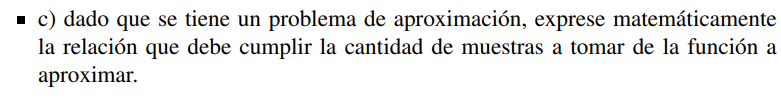
</figure>

Ante un problema de aproximación la relación que debe cumplirse es que la cantidad de muestras que se deben tomar sea mayor a la cantidad de incognitas (coeficientes) de la función de ajuste cuyos valores se desean obtener. Esto sucede ya que se busca ajustar lo mejor posible una función respecto de un conjunto de puntos, a diferencia de la interpolación donde se busca que la función pase por todos los puntos (en este último caso alcanza con que el numero de muestras sea igual al de incógnitas)

<br>

Entonces si llamamos $A$ a la matriz del sistema $A x = b$ a resolver, la cual posee $m$ filas y $n$ columnas, siendo $m$ la cantidad de muestras y $n$ la cantidad de incognitas de la función de ajuste, se tiene que:

<br>

$$m > n$$

<br>

En nuestro caso, la expresión queda:

$$ m > k_{max} + 1$$

---
##**d. Forma de $s(t)$ y de sistema a resolver para $k_{max} = 1,3,144$**

<figure>
<center>
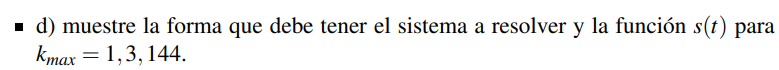
</figure>

Para $k_{max} = 1$:

$$
s(t) = a_0 + a_1 cos(wt) + b_1 sin (wt)
$$

Notar que puntualmente para la señal que se definió en el primer punto, todos los $a_k \ \ (\forall k = 0,1,...,k_{max})$ valen cero siempre (también para los demas $k_{max}$).

<br>

El sistema $A^T A \hat{x} = A^T b$ queda:

<br>

\begin{equation}
\underbrace{
\begin{bmatrix}
m & \sum_{i=1}^{m}cos(wt_i) & \sum_{i=1}^{m}sin(wt_i) \\
\\
\sum_{i=1}^{m}cos(wt_i)& \sum_{i=1}^{m}cos^2(wt_i) &\sum_{i=1}^{m}cos(wt_i)  sin(wt_i))\\
\\
\sum_{i=1}^{m}sin(wt_i) & \sum_{i=1}^{m}sin(wt_i) cos(wt_i) & \sum_{i=1}^{m}sin^2(wt_i)\\
\end{bmatrix}}_{A^T A}
\underbrace{
\begin{bmatrix}
a_0\\
\\
a_1\\
\\
b_1\\
\end{bmatrix}}_{\hat{x}}
=
\underbrace{\begin{bmatrix}
\sum_{i=1}^{m}s(t_i)\\
\\
\sum_{i=1}^{m}cos(w t_i)s(t_i)\\
\\
\sum_{i=1}^{m}sin(w t_i)s(t_i)\\
\end{bmatrix}}_{A^T b}
\end{equation}

<br>

---

<br>

Para $k_{max} = 3$:

$$
s(t) = a_0 + a_1 cos(wt) + a_2 cos(2wt) + a_3 cos(3wt) + b_1 sin (wt) + b_2 sin (2wt) + b_3 sin (3wt)
$$

<br>

El sistema $A^T A \hat{x} = A^T b$ queda con:

<br>

$A^TA =$
\begin{bmatrix}
m & \sum_{i=1}^{m}cos(wt_i) & \sum_{i=1}^{m}cos(2wt_i) & \sum_{i=1}^{m}cos(3wt_i) & \sum_{i=1}^{m}sin(wt_i) & \sum_{i=1}^{m}sin(2wt_i) & \sum_{i=1}^{m}sin(3wt_i)\\
\\
\sum_{i=1}^{m}cos(wt_i)& \sum_{i=1}^{m}cos^2(wt_i) & \sum_{i=1}^{m}cos(wt_i)cos(2wt_i) & \sum_{i=1}^{m}cos(wt_i)cos(3wt_i) & \sum_{i=1}^{m}cos(wt_i)sin(wt_i) & \sum_{i=1}^{m}cos(wt_i)sin(2wt_i) & \sum_{i=1}^{m}cos(wt_i)sin(3wt_i)\\
\\
\sum_{i=1}^{m}cos(2wt_i) & \sum_{i=1}^{m}cos(2wt_i)cos(wt_i) & \sum_{i=1}^{m}cos^2(2wt_i) & \sum_{i=1}^{m}cos(2wt_i)cos(3wt_i) & \sum_{i=1}^{m}cos(2wt_i)sin(wt_i) & \sum_{i=1}^{m}cos(2wt_i)sin(2wt_i) & \sum_{i=1}^{m}cos(2wt_i)sin(3wt_i)\\
\\
\sum_{i=1}^{m}cos(3wt_i) & \sum_{i=1}^{m}cos(3wt_i)cos(wt_i) & \sum_{i=1}^{m}cos(3wt_i)cos(2wt_i) & \sum_{i=1}^{m}cos^2(3wt_i) & \sum_{i=1}^{m}cos(3wt_i)sin(wt_i) & \sum_{i=1}^{m}cos(3wt_i)sin(2wt_i) & \sum_{i=1}^{m}cos(3wt_i)sin(3wt_i)\\
\\
\sum_{i=1}^{m}sin(wt_i) & \sum_{i=1}^{m}sin(wt_i)cos(wt_i) & \sum_{i=1}^{m}sin(wt_i)cos(2wt_i) & \sum_{i=1}^{m}sin(wt_i)cos(3wt_i) & \sum_{i=1}^{m}sin^2(wt_i) & \sum_{i=1}^{m}sin(wt_i)sin(2wt_i) & \sum_{i=1}^{m}sin(wt_i)sin(3wt_i)\\
\\
\sum_{i=1}^{m}sin(2wt_i) & \sum_{i=1}^{m}sin(2wt_i)cos(wt_i) & \sum_{i=1}^{m}sin(2wt_i)cos(2wt_i) & \sum_{i=1}^{m}sin(2wt_i)cos(3wt_i) & \sum_{i=1}^{m}sin(2wt_i)sin(wt_i) & \sum_{i=1}^{m}sin^2(2wt_i) & \sum_{i=1}^{m}sin(2wt_i)sin(3wt_i)\\
\\
\sum_{i=1}^{m}sin(3wt_i) & \sum_{i=1}^{m}sin(3wt_i)cos(wt_i) & \sum_{i=1}^{m}sin(3wt_i)cos(2wt_i) & \sum_{i=1}^{m}sin(3wt_i)cos(3wt_i) & \sum_{i=1}^{m}sin(3wt_i)sin(wt_i) & \sum_{i=1}^{m}sin(3wt_i)sin(2wt_i) & \sum_{i=1}^{m}sin^2(3wt_i)\\
\end{bmatrix}

<br>

$$
\hat{x} =
\begin{bmatrix}
a_0\\
a_1\\
a_2\\
a_3\\
b_1\\
b_2\\
b_3\\
\end{bmatrix}
$$

<br>

$$
A^T b = 
\begin{bmatrix}
\sum_{i=1}^{m}s(t_i)\\
\\
\sum_{i=1}^{m}cos(w t_i)s(t_i)\\
\\
\sum_{i=1}^{m}cos(2w t_i)s(t_i)\\
\\
\sum_{i=1}^{m}cos(3w t_i)s(t_i)\\
\\
\sum_{i=1}^{m}sin(w t_i)s(t_i)\\
\\
\sum_{i=1}^{m}sin(2w t_i)s(t_i)\\
\\
\sum_{i=1}^{m}sin(3w t_i)s(t_i)\\
\end{bmatrix}
$$

<br>

---

<br>

Para $k_{max} = 144$:

$$
s(t) = a_0 + a_1 cos(wt) + ... + a_{144} cos(144wt) + b_1 sin (wt) + ... + b_{144} sin (144wt)
$$

<br>

El sistema $A^T A \hat{x} = A^T b$ queda con:

$A^T A =$

\begin{bmatrix}
m & \sum_{i=1}^{m}cos(wt_i) & \dotsm & \sum_{i=1}^{m}cos(144 wt_i) & \sum_{i=1}^{m}sin(wt_i) & \dotsm & \sum_{i=1}^{m}sin(144wt_i)\\
\\
\sum_{i=1}^{m}cos(wt_i)& \sum_{i=1}^{m}cos^2(wt_i) & \dotsm & \sum_{i=1}^{m}cos(wt_i)  cos(144wt_i) & \sum_{i=1}^{m}cos(wt_i)  sin(wt_i) & \dotsm & \sum_{i=1}^{m}cos(wt_i)  sin(144wt_i)\\
\\
\vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
\\
\sum_{i=1}^{m}cos(144wt_i) & \sum_{i=1}^{m}cos(144wt_i) cos(wt_i) & \dotsm & \sum_{i=1}^{m}cos^2(144wt_i) & \sum_{i=1}^{m}cos(144wt_i) sin(wt_i) & \dotsm & \sum_{i=1}^{m}cos(144 wt_i) sin(144 wt_i\\
\\
\sum_{i=1}^{m}sin(wt_i) & \sum_{i=1}^{m}sin(wt_i) cos(wt_i) & \dotsm & \sum_{i=1}^{m}sin(wt_i) cos(144 wt_i) & \sum_{i=1}^{m}sin^2(wt_i) & \dotsm & \sum_{i=1}^{m}sin(wt_i) sin(144 wt_i)\\
\\
\vdots & \vdots & \ddots & \vdots & \vdots & \ddots & \vdots \\
\\
\sum_{i=1}^{m}sin(144 wt_i) & \sum_{i=1}^{m}sin(144 wt_i) cos(wt_i) & \dotsm & \sum_{i=1}^{m}sin(144wt_i) cos(144 wt_i) & \sum_{i=1}^{m}sin(144 wt_i) sin(wt_i) & \dotsm & \sum_{i=1}^{m}sin^2(144 wt_i)
\end{bmatrix}

<br>

$$
\hat{x}= \begin{bmatrix}
a_0\\
a_1\\
a_2\\
\vdots\\
a_{144}\\
b_1\\
b_2\\
\vdots\\
b_{144}\\
\end{bmatrix}
$$

<br>

$$
A^T b =\begin{bmatrix}
\sum_{i=1}^{m}s(t_i)\\
\sum_{i=1}^{m}cos(wt_i)s(t_i)\\
\vdots\\
\sum_{i=1}^{m}cos(144 wt_i)s(t_i)\\
\sum_{i=1}^{m}sin(wt_i)s(t_i)\\
\vdots\\
\sum_{i=1}^{m}sin(144 wt_i)s(t_i)\\
\end{bmatrix}
$$

<br>

---

<br>

Se puede notar cómo siempre se repite el mismo patrón, donde $A^T A$ devuelve una matriz simetrica de $n \times n$ donde $n$ (cantidad de columnas) es $2k_{max}+1$. Además, todos los elementos implican una sumatoria de $m$ iteraciones, siendo $m$ la cantidad de muestras utilizadas.
Por último, en la diagonal también aparece un comportamiento distintivo donde la expresión correspondiente a esa columna está elevada al cuadrado.

<br>

Finalmente, se puede generalizar este patrón afirmando que cada elemento de la matriz $A^T A$ en la posición (l,j) tiene la forma:

$$
a \ '_{(l \ , \ j)} = \sum_{i=1}^{m} a_{(i \ , \ l)} \cdot a_{(i \ , \ j)} \ \ \ , \ con \ \ l,j = 1,2,...,2k_{max}\\
$$
Donde $a_{(l \ , \ j)}$ es el elemento de la fila $l$ y de la columna $j$ de la matriz inicial $A$ (la que se tenía antes de minimizar).

<br>

Y los elementos de $A^T b$ son de la forma:
$$
b \ '_{(l \ , \ 1)} = \sum_{i=1}^{m} s(t_i) \cdot a_{(1 \ , \ l)}
$$




## **Implementacion de funciones para obtener el sistema de ecuaciones**

In [16]:

#Las muestras son para valores de t pertenecientes al intervalo [-0.5 , 0.5] que comprende un sólo período completo

def obtener_muestras_de_un_periodo_fourier(cantidad_muestras, periodo):

    muestras_t = np.linspace(-periodo/2, periodo/2, cantidad_muestras)

    muestras_y_positivo = np.heaviside(muestras_t[muestras_t >= 0],0)
    muestras_y_negativo = -np.heaviside(-muestras_t[muestras_t < 0],0)

    muestras_y = np.append(muestras_y_negativo,muestras_y_positivo)

    return muestras_t, muestras_y

In [17]:
#Devuelve la matriz A del sistema original inicial del que se parte -> A x = b antes de aplicar cuadrados minimos.
def obtener_matriz_A(muestras_t, k_max, periodo):

    cant_fil = len(muestras_t)
    cant_col = 2*k_max + 1
    matriz_A = np.zeros((cant_fil, cant_col))

    w = 2*np.pi/periodo

    for i in range(0,cant_fil):
        for j in range(0,cant_col):
        
            if (j == 0):
                matriz_A[i,j] = 1
        
            elif (0 < j <= k_max):
                matriz_A[i,j] = np.cos(j*w*muestras_t[i])
        
            elif (j > k_max):
                matriz_A[i,j] = np.sin((j-k_max)*w*muestras_t[i])

    return matriz_A
    

In [18]:
#Recibe el kmax y el conjunto de muestras t y s(t).
#Devuelve la matriz del sistema de cuadrados minimos: A^T A y tambien A^T b (identificada como matriz resultado)
def obtener_sistema_fourier_cuadrados_minimos(muestras_t,muestras_y, k_max, periodo):

    if( len(muestras_t) <= (2*k_max + 1) ):
        print("Cantidad insuficiente de muestras. Debe ser mayor a: ", 2*k_max + 1)
        return -1

    matriz_A = obtener_matriz_A(muestras_t, k_max, periodo)
    matriz_A_traspuesta = np.transpose(matriz_A)

    matriz_sistema = np.dot(matriz_A_traspuesta, matriz_A)
    matriz_resultado = np.dot(matriz_A_traspuesta,muestras_y)

    return matriz_sistema,matriz_resultado


# **3. Resolución mediante eliminación gaussiana con pivoteo parcial**

## **a. Describa en no más de 1 página el método de eliminación gaussiana con pivoteo parcial.**

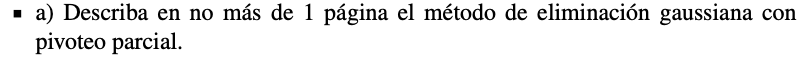

El método de eliminación gaussiana con pivoteo parcial se basa en la supresión progresiva de variables en el sistema de ecuaciones, con el fin de alcanzar una única ecuación con una sola incógnita. Al hallar su valor, se lleva a cabo un reemplazo de la misma sucesivo, para así encontrar los valores de las otras variables.

Para esto, primero, se debe identificar al número más grande en valor absoluto de la primera columna de la matriz, el primer pivote. La fila que lo contenga se la intercambia con la primera. Después, se opera para que ese número, que ahora se encuentra en la posición a11 se vuelva 1. Como siguiente paso, se realizan distintas operaciones matemáticas para que los números restantes de la primera columna sean 0.

Luego, se busca al número cuyo valor absoluto es máximo en la segunda columna de la matriz, sin contar al número de la primera fila. Nuevamente, la fila que lo contenga cambia de posición, pasando a ser la segunda, y se vuelve a operar para que la posición a22 sea ocupada por el número 1, y aquellos en posiciones inferiores dentro de la columna sean 0.

Este procedimiento se repite sucesivamente hasta que quede una matriz diagonal superior, cuyos valores en la diagonal sean 1. Así, se podrá ubicar rápidamente el valor de xn y se reemplazará su valor, y el de las progresivas variables, hasta poder hallar todas las incógnitas.

Este método nos permite evitar o minimizar los errores de redondeo al obtener los valores más pequeños posibles para los multiplicadores, y así también se esquiva el problema de dividir por números cercanos al 0.


## **b. Implementación del metodo de Gauss con pivoteo parcial**
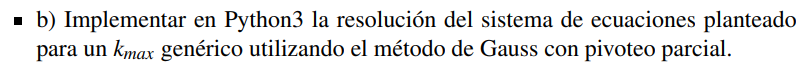

In [19]:
#-----------------Funciones auxiliares--------------------------------------

def resolver_triangular(A, b, superior = True):
    cant_filas, cant_columnas = A.shape
    if superior:
        rango_1 = range(cant_filas - 1, -1, -1) #Si es triangular sup. empieza a iterar desde la ultima columna hacia atras
    else:
        rango_1 = range(cant_filas) #Si es triangular inf itera desde la primera hacia adelante
    x = np.zeros(cant_columnas)
    for i in rango_1:
        if np.allclose(A[i][i], 0): #Chequea que no haya un 0 multiplicando a x
            x[i] = 0
        else:
            if superior:
                rango_2 = range(i+1, cant_columnas) #Si es triangular sup. tengo que restar los elementos a la derecha del elemento de la diagonal
            else:
                rango_2 = range(i) #Si es triangular inf. resto los de la izquierda de la diagonal
            valor_x = b[i]
            for j in rango_2:
                valor_x -= A[i][j] * x[j]
            x[i] = valor_x / A[i][i]
    return x

def matriz_permutacion(tamanio, fila_intercambiada_1, fila_intercambiada_2):
    P = np.zeros((tamanio, tamanio))
    for i in range(tamanio):
        if i != fila_intercambiada_1 and i != fila_intercambiada_2:
            P[i][i] = 1
    P[fila_intercambiada_1][fila_intercambiada_2] = 1
    P[fila_intercambiada_2][fila_intercambiada_1] = 1
    
    return P

def intercambiar_filas(matriz, fila_1, fila_2):
    fila_aux = np.copy(matriz[fila_1,:]) #Copia la fila de arriba para poder intercambiarla con la de mayor valor
    matriz[fila_1,:] = matriz[fila_2,:] 
    matriz[fila_2,:] = fila_aux

def verificar_resultado(A, x, b):
    if (np.allclose(A @ x, b)):
        print("Resultado correcto")
    else:
        print("Resultado incorrecto")

#-------------------------------------------------------------------------------    

def gauss_pivoteo(A, b):
    cant_filas, cant_columnas = A.shape
    if cant_filas != cant_columnas:
        print("La matriz no es cuadrada")
        return
    A_triangulada = np.copy(A) #Hago una copia ara no modificar a A
    b_con_permutaciones = np.copy(b)
    
    for j in range(cant_columnas):
        valor_absoluto_max = abs(A_triangulada[j][j])
        fila_valor_max = j
        
        #Pivoteo
        for i in range(j+1, cant_filas):#Recorre las filas abajo de la diagonal
            if abs(A_triangulada[i][j]) > valor_absoluto_max:
                fila_valor_max = i
                valor_absoluto_max = abs(A_triangulada[i][j])
        if fila_valor_max != j: 
            intercambiar_filas(A_triangulada, j, fila_valor_max)
            P = matriz_permutacion(cant_filas, j, fila_valor_max)
            b_con_permutaciones = P @ b_con_permutaciones
            
        if np.allclose(A_triangulada[j][j], 0): #Significaria que toda la columna tiene 0s, ya que por el pivoteo, en la diagonal queda el valor absoluto mas alto de la columna
            continue
        
        for i in range(j+1, cant_filas): #Empieza a recorrer las filas debajo de la diagonal
            m = A_triangulada[i][j] / A_triangulada[j][j]
            A_triangulada[i,:] = A_triangulada[i,:] - m*A_triangulada[j,:]
            b_con_permutaciones[i] = b_con_permutaciones[i] - m*b_con_permutaciones[j]
            
    X = resolver_triangular(A_triangulada, b_con_permutaciones)
    print("Verificacion del vector obtenido")
    verificar_resultado(A, X, b)
    verificar_resultado(A_triangulada, X, b_con_permutaciones)
    
    return X

## **c. Resolución del sistema para diferentes kmax**
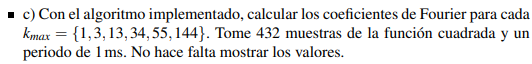

In [20]:
periodo = 1

muestras_t, muestras_y = obtener_muestras_de_un_periodo_fourier(432, periodo)
lista_k_max = np.array([1,3,13,34,55,144])
y_fourier_g = []
for k in lista_k_max:
    
    matriz_sistema, matriz_resultado = obtener_sistema_fourier_cuadrados_minimos(muestras_t, muestras_y, k, periodo)

    coeficientes = gauss_pivoteo(matriz_sistema, matriz_resultado) 

    k_max = (len(coeficientes)-1) / 2
    w = 2*np.pi/periodo
    y_fourier = np.zeros(len(muestras_t))

    for i in range(len(coeficientes)):
        if(i <= (k_max)):
            y_fourier += coeficientes[i] * np.cos(w*i*muestras_t)
        else:
            y_fourier += coeficientes[i] * np.sin(w*(i-k_max)*muestras_t)
    y_fourier_g.append((k, y_fourier, coeficientes))

Verificacion del vector obtenido
Resultado correcto
Resultado correcto
Verificacion del vector obtenido
Resultado correcto
Resultado correcto
Verificacion del vector obtenido
Resultado correcto
Resultado correcto
Verificacion del vector obtenido
Resultado correcto
Resultado correcto
Verificacion del vector obtenido
Resultado correcto
Resultado correcto
Verificacion del vector obtenido
Resultado correcto
Resultado correcto


## **d. Comparación de curvas y señal cuadrada ideal**
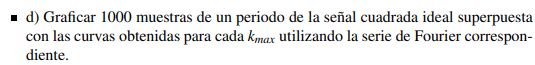

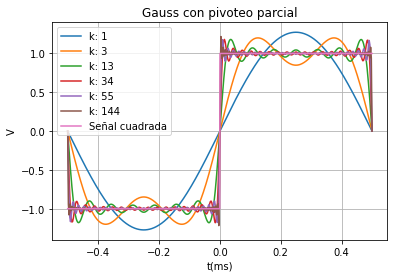

In [21]:
plt.figure()

for y in y_fourier_g:
    plt.plot(muestras_t,y[1], label = f"k: {y[0]}")
muestras_t, muestras_y = obtener_muestras_de_un_periodo_fourier(1000, periodo)
plt.plot(muestras_t,muestras_y, label = "Señal cuadrada")
plt.title("Gauss con pivoteo parcial")
plt.xlabel("t(ms)")
plt.ylabel("V")
plt.legend()
plt.grid()
plt.show()

## **e. Valores de $k$ necesarios para obtener representación exacta**

<figure>
<center>
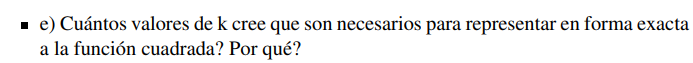
<figure\>

De acuerdo a la expresión de la serie de Fourier:

$$
x(t) = a_0 + \sum_{k = 1}^{+\infty} a_k \cdot cos(kwt) + \sum_{k = 1}^{+\infty} b_k \cdot sin(kwt)
$$

La única forma de conseguir la función exacta a partir de la suma de senos y cosenos es usando un $k_{max}$ igual a $+\infty$, es decir, se necesitan infinitos valores de $k$. De lo contrario, se va a obtener siempre una aproximación, que a pesar de que puede ser muy buena no tiene su forma exacta.
La razón de que se necesiten infinitos $k$ es que por cada iteración, la señal generada con Fourier se va ajustando y "pegando" un poco más a la señal real, sin embargo nunca va a llegar a ser exactamente igual, por eso el numero de iteraciones requerido es infinito.

# **4. Resolución mediante el método iterativo de Gauss-Seidel**

## **a. Describa en no más de 1 página el método iterativo de Gauss-Seidel.**

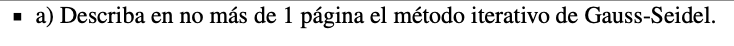

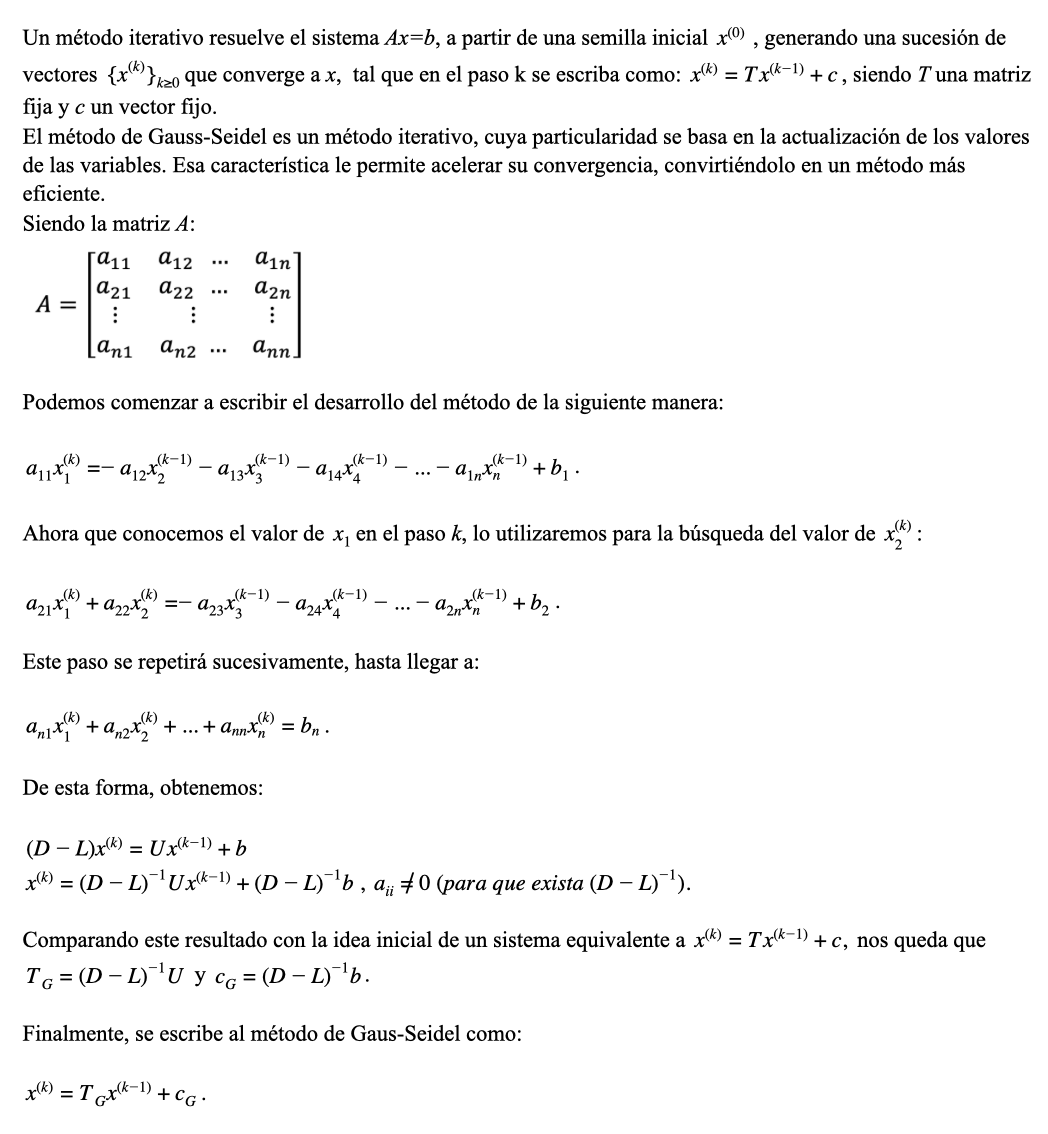

## **b. Implementación del método de Gauss-Seidel**
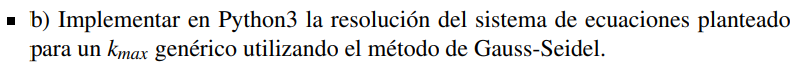

In [22]:
#---------------Funciones auxiliares--------------------------------

def obtener_matriz_diagonal(A):
    cant_filas, cant_columnas = A.shape
    D = np.zeros((cant_filas, cant_columnas))
    for i in range(min(cant_filas, cant_columnas)):
        D[i][i] = A[i][i]
    
    return D

def obtener_matriz_triang_inf(A):
    cant_filas, cant_columnas = A.shape
    L = np.zeros((cant_filas, cant_columnas))
    for i in range(cant_filas):
        for j in range(min(cant_columnas,i+1)):
            L[i][j] = A[i][j]
    
    return L

def obtener_matriz_triang_sup(A):
    cant_filas, cant_columnas = A.shape
    U = np.zeros((cant_filas, cant_columnas))
    for j in range(cant_columnas):
        for i in range(min(cant_filas, j+1)):
            U[i][j] = A[i][j]
    
    return U

def verificarDescomposicion(A,D,L,U):
    if np.allclose(A,D-L-U) is True:
        print("Descomposicion correcta.")
    else:
        print("Descomposicion incorrecta")

def verificar_inversa(A, inversa):
    cant_filas, cant_columnas = A.shape
    if np.allclose(A @ inversa, np.identity(cant_filas)):
        print("Inversa calculada correctamente")
    else:
        print("Inversa calculada incorrectamente")        

def invertir_matriz_triangular_inf(A):
    cant_filas, cant_columnas = A.shape
    
    if cant_filas != cant_columnas:
        print("La matriz no es cuadrada")
        return
    if (obtener_matriz_triang_sup(A) - obtener_matriz_diagonal(A)).any():
        print("La matriz no es triangular inferior")
        return
    for i in range(cant_filas):
        if A[i][i] == 0:
            print("La matriz tiene un 0 en la diagonal y por lo tanto no es inversible")
            return
        
    identidad = np.identity(cant_filas)
    inversa = np.zeros((cant_filas, cant_columnas))
    for columna in range(cant_columnas):
        inversa[:, columna] = resolver_triangular(A, identidad[:, columna], superior = False)
    verificar_inversa(A, inversa)
    
    return inversa  

def matrices_gauss_seidel(A, b):
    D = obtener_matriz_diagonal(A)
    L = D - obtener_matriz_triang_inf(A)
    U = D - obtener_matriz_triang_sup(A)

    print("Verificacion de descomposicion:")
    verificarDescomposicion(A,D,L,U)

    inversa = invertir_matriz_triangular_inf(D-L)
    T = inversa @ U
    c = inversa @ b

    return T, c   

def norma_infinito(T):
    (filas, columnas) = T.shape
    sums = np.zeros(filas)
    
    for f in range(filas):
        for c in range(columnas):
            sums[f] += np.abs(T[f, c])
    
    return np.max(sums)

#---------------------------------------------------------------------------------

def gauss_seidel(T,c,x0,max_iteraciones, cota_error_porcentual):
    x = np.zeros((x0.size, max_iteraciones+1))
    x[:,0] = x0

    error_porcentual = np.nan
    norma_infinito_T = norma_infinito(T)
    
    for k in range(max_iteraciones):
        x[:,k+1] = T @ x[:,k] + c
        error_porcentual = norma_infinito_T ** (k+1) * np.linalg.norm(x[:,1] - x[:,0], np.Inf) / (1 - norma_infinito_T) * 100 #No se si es esta la formula del error 
        
        if error_porcentual < cota_error_porcentual:
            return x[:, k+1]
    print("Se alcanzo el limite de iteraciones")
    return 

## **c. Resolucion del sistema para diferentes kmax**
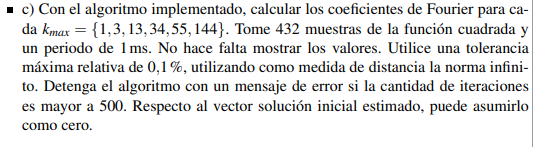

In [23]:

Nmax = 500

periodo = 1

muestras_t, muestras_y = obtener_muestras_de_un_periodo_fourier(432, periodo)
lista_k_max = np.array([1,3,13,34,55,144])
y_fourier_gs = []
for k in lista_k_max:
    x0 = np.zeros((2 * k) + 1)
    matriz_sistema, matriz_resultado = obtener_sistema_fourier_cuadrados_minimos(muestras_t, muestras_y, k, periodo)
    T, c = matrices_gauss_seidel(matriz_sistema, matriz_resultado)

    coeficientes = gauss_seidel(T, c, x0, Nmax, 0.1) 

    k_max = (len(coeficientes)-1) / 2
    w = 2*np.pi/periodo
    y_fourier = np.zeros(len(muestras_t))

    for i in range(len(coeficientes)):
        if(i <= (k_max)):
            y_fourier += coeficientes[i] * np.cos(w*i*muestras_t)
        else:
            y_fourier += coeficientes[i] * np.sin(w*(i-k_max)*muestras_t)
    y_fourier_gs.append((k, y_fourier, coeficientes, T, matriz_sistema)) #Guardo esas 2 matrices porque se usan en el punto 5

Verificacion de descomposicion:
Descomposicion correcta.
Inversa calculada correctamente
Verificacion de descomposicion:
Descomposicion correcta.
Inversa calculada correctamente
Verificacion de descomposicion:
Descomposicion correcta.
Inversa calculada correctamente
Verificacion de descomposicion:
Descomposicion correcta.
Inversa calculada correctamente
Verificacion de descomposicion:
Descomposicion correcta.
Inversa calculada correctamente
Verificacion de descomposicion:
Descomposicion correcta.
Inversa calculada correctamente


## **d. Comparación de curvas y señal cuadrada ideal**
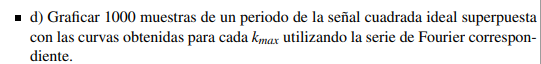

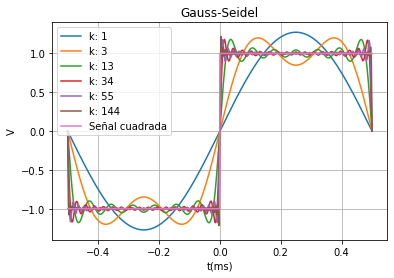

In [24]:
plt.figure()

for y in y_fourier_gs:
    plt.plot(muestras_t,y[1], label = f"k: {y[0]}")
muestras_t, muestras_y = obtener_muestras_de_un_periodo_fourier(1000, periodo)
plt.plot(muestras_t,muestras_y, label = "Señal cuadrada")
plt.title("Gauss-Seidel")
plt.xlabel("t(ms)")
plt.ylabel("V")
plt.legend()
plt.grid()
plt.show()

# **5. Comparación entre métodos de solución utilizados**

## **a. Cálculo de errores de coeficientes**
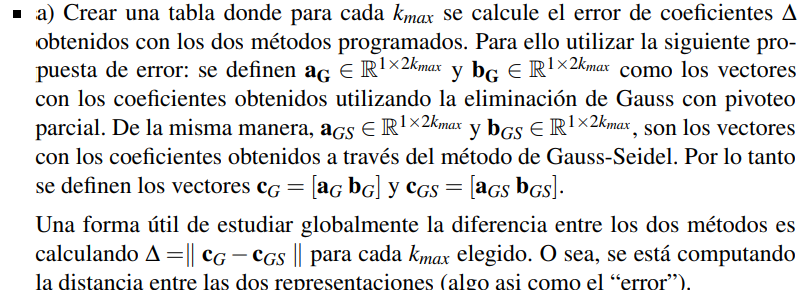

In [25]:
print("K max \t Error")
for i in range(len(lista_k_max)):
  k = y_fourier_g[i][0]
  c_g = y_fourier_g[i][2]
  c_gs = y_fourier_gs[i][2]
  print(f"{k} \t {np.linalg.norm(c_g - c_gs)}")

K max 	 Error
1 	 1.1538790907309406e-19
3 	 5.551246582551242e-17
13 	 6.798701291808905e-17
34 	 1.0500519208765646e-16
55 	 1.3895494935368763e-16
144 	 1.7557656805815574e-16


## **b. Calculo del error cuadrático global al usar Gauss-Seidel**
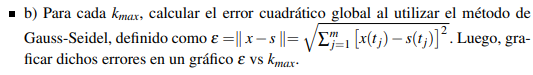

K max: 1 	 Error cuadratico: 9.091075424719016
K max: 3 	 Error cuadratico: 6.620685344502001
K max: 13 	 Error cuadratico: 3.6711770071981045
K max: 34 	 Error cuadratico: 2.4876135874882555
K max: 55 	 Error cuadratico: 2.050286980552894
K max: 144 	 Error cuadratico: 1.5486762586163296


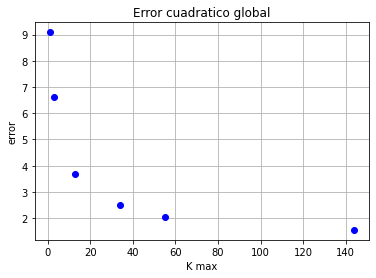

In [26]:
muestras_t, muestras_y = obtener_muestras_de_un_periodo_fourier(432, periodo)
lista_errores = []

for y in y_fourier_gs:
    error_cuadratico = 0
    for i in range(y[1].size):
        error_cuadratico += (muestras_y[i] - y[1][i])**2
    error_cuadratico = np.sqrt(error_cuadratico)
    print(f"K max: {y[0]} \t Error cuadratico: {error_cuadratico}")
    lista_errores.append(error_cuadratico)

errores = np.array(lista_errores)
plt.figure()
plt.plot(lista_k_max, errores, 'bo')
plt.title("Error cuadratico global")
plt.xlabel("K max")
plt.ylabel("error")
plt.grid()
plt.show()

## **c. Número de condición de A, radio espectral y norma infinito de T de Gauss-Seidel**
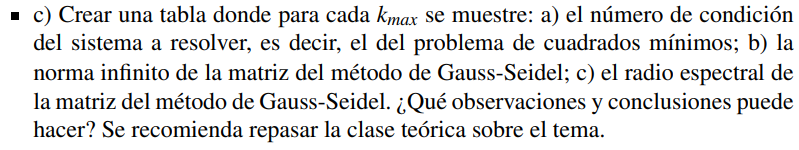

In [27]:
def imprimir_informacion_matrices(k, A, T):
    numero_condicion = norma_infinito(A) * norma_infinito(inv(A))
    autovalores, autovectores = np.linalg.eig(T)
    radio_espectral = max(abs(autovalores))
    norma_infinito_T = norma_infinito(T)
    print(f"{k} \t------\t {numero_condicion} \t------\t {radio_espectral} \t------\t {norma_infinito_T}")

print("Kmax \t\t n_condicion \t\t Radio espectral \t\t Norma infinito de T")
for i in range(len(lista_k_max)):
  k = y_fourier_gs[i][0]
  T = y_fourier_gs[i][3]
  A = y_fourier_gs[i][4]
  imprimir_informacion_matrices(k, A, T) 

Kmax 		 n_condicion 		 Radio espectral 		 Norma infinito de T
1 	------	 2.009280742459397 	------	 1.069198528782681e-05 	------	 0.0023148148148147258
3 	------	 2.0323872485141266 	------	 0.0006726026312432311 	------	 0.009227183303395723
13 	------	 2.168664322840156 	------	 0.008500587336310766 	------	 0.05530963989393435
34 	------	 2.4435266821345887 	------	 0.028609042392332668 	------	 0.15208279873406508
55 	------	 2.705995667845369 	------	 0.05016909549781005 	------	 0.24885595757419626
144 	------	 3.730858468678011 	------	 0.14360500833785558 	------	 0.6589898212300291


Las observaciones y conclusiones que se pueden extraer a partir de la información obtenida son:

*	En primer lugar, notamos que el radio espectral de la matriz del sistema es menor a 1 para todos los $k_{max}$ (excepto $k_{max}$ = 1). Con esta información podemos recurrir al teorema que afirma que el método convergerá si y sólo si se cumple que $\rho(T) < 1$

*	Por otro lado, un corolario del teorema anterior afirma que si se cumple que $||T||_{\infty} < 1$ entonces el método converge. Esto se cumple para todos los $k_{max}$ (aunque da lugar a una contradicción para el caso de $k_{max}$ = 1).

*	Finalmente, en cuanto al número de condición de las matrices del sistema a resolver podemos observar que se cumple para todos los $k_{max}$ que $K(A)$ no es mucho mayor a 1, lo cual significa que las matrices no quedaron mal condicionadas por lo tanto podemos resolver el sistema aplicando algún método como por ejemplo Gauss- Seidel sin que los resultados obtenidos varíen mucho con respecto de los verdaderos. En caso contrario, habría que haber aplicado un algoritmo de refinamiento iterativo.


## **d. k max necesario para tener error 0 y fenómeno de Gibbs**
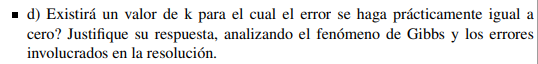

La respuesta es no. Sin importar el k max que se tome, en los x cercanos a donde la función original tiene una discontinuidad, en la serie de Fourier aparecen unos picos. Estos picos se conocen como fenómeno de Gibbs y son una desventaja del uso de series de Fourier. Ir aumentando el k max reducirá el error hasta ser casi nulo en los x donde la función original es continua, pero los picos causados por Gibbs harán que el error total sea siempre mayor a 0. Esto se puede apreciar en los gráficos, especialmente con k = 34, k = 55, y k = 144.

## **e. Errores presentes en la resolución del problema**
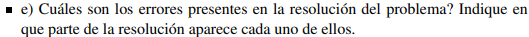

En la resolución del problema aparece el error de Gibbs, mencionado en el punto anterior. También, al estar trabajando con computadoras de precisión finita, se ve el error causado por truncamientos y redondeos al operar con numeros en punto flotante. Un ejemplo es en el cálculo de los a_n, los cuales sabemos que son 0 pero cuando los calcula la computadora toman valores distintos a eso (aunque tan pequeños que los consideramos 0, pues exceden la precisión de la computadora).